## MACHINE LEARNING DAY-9 : Polynomial Regression

### What is **Polynomial Regression**?

**Polynomial Regression** is a type of regression analysis in which the relationship between the **independent variable** $x$ and the **dependent variable** $y$ is modeled as an **nth-degree polynomial**.

It's an extension of **linear regression** that allows you to **fit curved lines** to the data.

---

### General Form

For degree $n$, the model is:

$$
y = \beta_0 + \beta_1x + \beta_2x^2 + \beta_3x^3 + \dots + \beta_nx^n + \varepsilon
$$

Where:

* $y$: dependent variable (output)
* $x$: independent variable (input)
* $\beta_0, \beta_1, \dots, \beta_n$: coefficients
* $\varepsilon$: error term

---

### Key Characteristics

| Feature                        | Description                                                                     |
| ------------------------------ | ------------------------------------------------------------------------------- |
| **Captures non-linearity**     | Allows modeling of **curved trends**.                                           |
| **Still linear in parameters** | Despite being polynomial in $x$, it’s **linear in the coefficients** $\beta$.   |
| **Degree matters**             | Higher-degree polynomials can fit more complex curves but risk **overfitting**. |

---

### Example: Linear vs Polynomial

Let’s say you're predicting the price of a car based on its age.

* **Linear Regression**: Assumes price drops at a constant rate with age.
* **Polynomial Regression**: Can model a curve where price drops fast initially and then levels out.

---

### Polynomial Regression vs Overfitting

* **Degree 1 (Linear)**: Might underfit the data (too simple).
* **Degree too high**: Might overfit (fits noise instead of trend).
* Choose optimal degree using **cross-validation** or **regularization (e.g., Ridge/Lasso with polynomial features)**.

---

### Python Example

```python
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Degree-3 polynomial regression
model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
```

---

### When to Use Polynomial Regression?

* When data shows a **non-linear trend**.
* When linear regression **underfits** the data.
* When feature relationships are **curved or complex** but still continuous.

### Importing the libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset

In [6]:
df = pd.read_csv('../datasets/Position_Salaries.csv')
print(df.head())

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


In [7]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values
print(X)
print('\n')
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


### Training the Linear Regression model on whole dataset

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

### Training the Polynomial Regression model on whole dataset with degree 2

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg_2 = PolynomialFeatures(degree = 2)
X_poly_2 = poly_reg_2.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly_2, y)

LinearRegression()

### Training the Polynomial Regression model on whole dataset with degree 3

In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg_3 = PolynomialFeatures(degree = 3)
X_poly_3 = poly_reg_3.fit_transform(X)
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_poly_3, y)

LinearRegression()

### Training the Polynomial Regression model on whole dataset with degree 4

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg_4 = PolynomialFeatures(degree = 4)
X_poly_4 = poly_reg_4.fit_transform(X)
lin_reg_4 = LinearRegression()
lin_reg_4.fit(X_poly_4, y)

LinearRegression()

### Visualising the Linear Regression Results

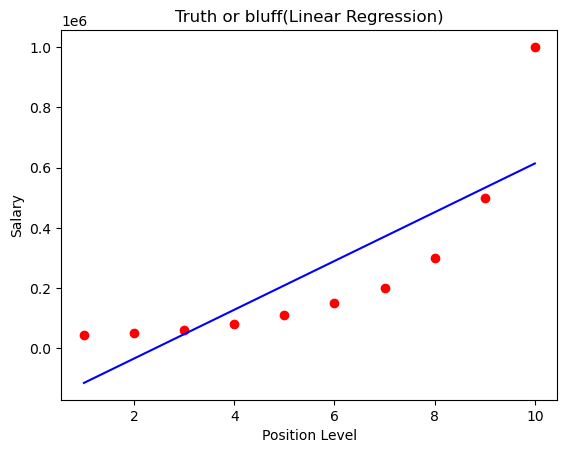

In [17]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.title('Truth or bluff(Linear Regression)')
plt.show()

### Visualising the Polynomial Regression with degree 2 Results

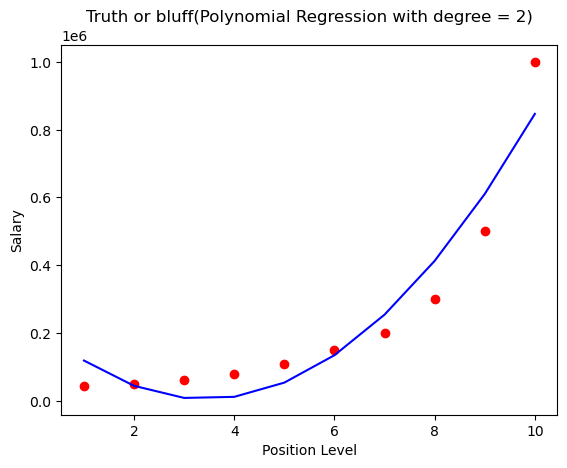

In [19]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg_2.fit_transform(X)), color = 'blue')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.title('Truth or bluff(Polynomial Regression with degree = 2)')
plt.show()

### Visualising the Polynomial Regression with degree 3 Results

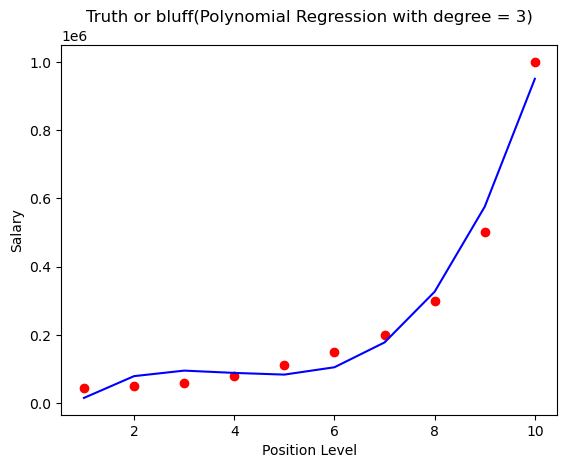

In [21]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_3.predict(poly_reg_3.fit_transform(X)), color = 'blue')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.title('Truth or bluff(Polynomial Regression with degree = 3)')
plt.show()

### Visualising the Polynomial Regression with degree 4 Results

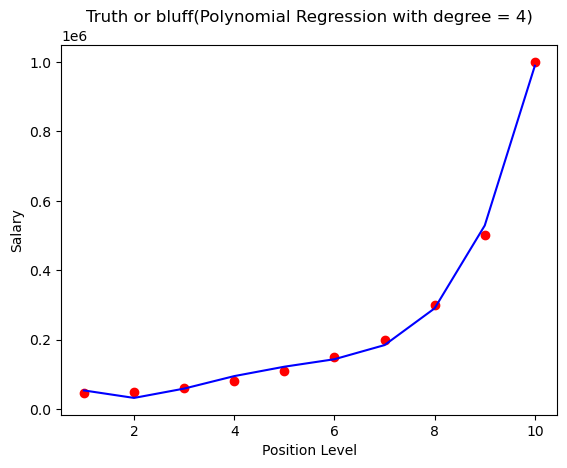

In [23]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_4.predict(poly_reg_4.fit_transform(X)), color = 'blue')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.title('Truth or bluff(Polynomial Regression with degree = 4)')
plt.show()

### Predicting a new result with Linear Regression

In [25]:
lin_reg.predict([[6.5]])

array([330378.78787879])

### Predicting a new result with Polynomial Regression with degree = 2,3,4

In [27]:
print(lin_reg_2.predict(poly_reg_2.fit_transform([[6.5]])))
print(lin_reg_3.predict(poly_reg_3.fit_transform([[6.5]])))
print(lin_reg_4.predict(poly_reg_4.fit_transform([[6.5]])))

[189498.10606061]
[133259.46969697]
[158862.45265153]


### Evaluating the performance metrics with Linear Regression

In [29]:
# Evaluating the performance metrics with Linear Regression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
y_pred_linear = lin_reg.predict(X)
print('Linear Regression Performance Metrics:')
print('R2 Score : ', r2_score(y, y_pred_linear))
print('MAE Score : ', mean_absolute_error(y, y_pred_linear))
print('MSE Score : ', mean_squared_error(y, y_pred_linear))
rmse = mean_squared_error(y, y_pred_linear, squared=False)
print("RMSE : ", rmse)

Linear Regression Performance Metrics:
R2 Score :  0.6690412331929895
MAE Score :  128454.54545454546
MSE Score :  26695878787.878788
RMSE :  163388.73519272613


### Evaluating the performance metrics with Polynomial Regression with degree = 2,3,4

In [31]:
# Evaluating the performance metrics with Polynomial Regression with degree = 2,3,4
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# Degree 2
y_pred_poly2 = lin_reg_2.predict(poly_reg_2.fit_transform(X))
print('\nPolynomial Regression (Degree 2) Performance Metrics:')
print('R2 Score : ', r2_score(y, y_pred_poly2))
print('MAE Score : ', mean_absolute_error(y, y_pred_poly2))
print('MSE Score : ', mean_squared_error(y, y_pred_poly2))
rmse2 = mean_squared_error(y, y_pred_poly2, squared=False)
print("RMSE : ", rmse2)

# Degree 3
y_pred_poly3 = lin_reg_3.predict(poly_reg_3.fit_transform(X))
print('\nPolynomial Regression (Degree 3) Performance Metrics:')
print('R2 Score : ', r2_score(y, y_pred_poly3))
print('MAE Score : ', mean_absolute_error(y, y_pred_poly3))
print('MSE Score : ', mean_squared_error(y, y_pred_poly3))
rmse3 = mean_squared_error(y, y_pred_poly3, squared=False)
print("RMSE : ", rmse3)

# Degree 4
y_pred_poly4 = lin_reg_4.predict(poly_reg_4.fit_transform(X))
print('\nPolynomial Regression (Degree 4) Performance Metrics:')
print('R2 Score : ', r2_score(y, y_pred_poly4))
print('MAE Score : ', mean_absolute_error(y, y_pred_poly4))
print('MSE Score : ', mean_squared_error(y, y_pred_poly4))
rmse4 = mean_squared_error(y, y_pred_poly4, squared=False)
print("RMSE : ", rmse4)


Polynomial Regression (Degree 2) Performance Metrics:
R2 Score :  0.9162082221443942
MAE Score :  70218.18181818188
MSE Score :  6758833333.333334
RMSE :  82212.12400451246

Polynomial Regression (Degree 3) Performance Metrics:
R2 Score :  0.9812097727913367
MAE Score :  34790.20979020935
MSE Score :  1515662004.6620033
RMSE :  38931.504012329184

Polynomial Regression (Degree 4) Performance Metrics:
R2 Score :  0.9973922891706614
MAE Score :  12681.81818184008
MSE Score :  210343822.8438184
RMSE :  14503.234909626832
